In [1]:
%matplotlib inline
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

sys.path.append("../") # go to parent dir
from chh_utils import load_housing_data, split_train_test_by_id



In [10]:
print(os.getcwd())
os.listdir("..\dataset")

D:\repos\python_tutorial\handson-ml\01 housing\notebook


['housing.csv']

In [4]:
housing = load_housing_data("..\dataset")

In [40]:
# housing.head()

# housing.info()

# housing["ocean_proximity"].value_counts()

# housing.describe()
len(housing)

20640

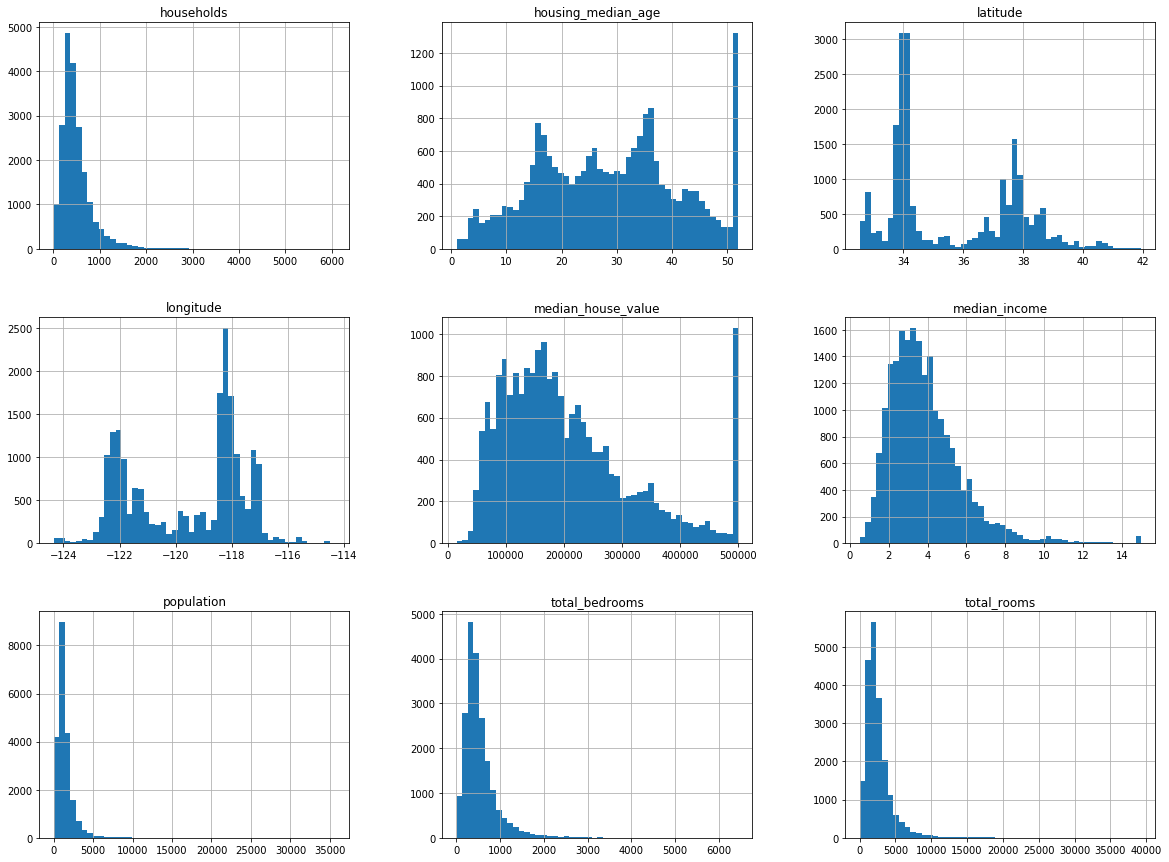

In [19]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [45]:
# shuffle indices for 0 to #indices in housing
test_ratio = 0.2
data = housing

shuffled_indices = np.random.permutation(len(data))
test_set_size = int(len(data) * test_ratio)
test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:]

return data.iloc[train_indices], data.iloc[test_indices]




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2859,-118.94,35.39,13.0,3137.0,417.0,1318.0,397.0,7.7751,194100.0,INLAND
16036,-122.46,37.72,48.0,1690.0,339.0,962.0,317.0,3.2875,221500.0,NEAR OCEAN
9214,-120.16,37.12,29.0,1995.0,392.0,1261.0,354.0,1.9073,79200.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
13675,-117.27,34.06,20.0,5258.0,1514.0,3780.0,1404.0,2.0250,85700.0,INLAND
7528,-118.23,33.91,34.0,661.0,146.0,742.0,143.0,2.1734,88200.0,<1H OCEAN
2813,-119.04,35.42,47.0,1691.0,402.0,913.0,358.0,1.8403,54700.0,INLAND
17601,-121.90,37.30,52.0,1575.0,284.0,629.0,284.0,5.6437,312000.0,<1H OCEAN
11498,-118.04,33.72,14.0,4494.0,1048.0,2222.0,963.0,4.7821,169400.0,<1H OCEAN
9844,-121.90,36.59,42.0,2689.0,510.0,1023.0,459.0,4.6182,301000.0,NEAR OCEAN


In [77]:
# add ID column to dataset
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


In [5]:
# use sklearn to split dataset into train and test sets
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

len(train_set) + len(test_set)

20640

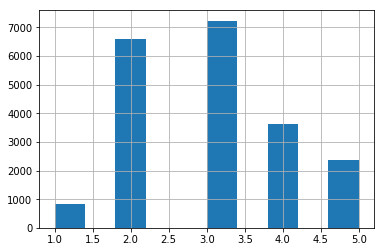

In [21]:
# housing["median_income"].describe()
# housing["median_income"].hist()

housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist()


In [24]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

train_set.head()


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3.0
